# EDA & Data Preprocessing

## Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
base_path = '../data/raw/rossmann-store-sales'
train_path = os.path.join(base_path, 'train.csv')
test_path = os.path.join(base_path, 'test.csv')
store_path = os.path.join(base_path, 'store.csv')

if os.path.exists(train_path) and os.path.exists(test_path) and os.path.exists(store_path):
	rossman_df_train = pd.read_csv(train_path)
	rossman_df_test = pd.read_csv(test_path)
	rossman_df_store = pd.read_csv(store_path)
else:
	print("One or more files do not exist. Please check the file paths.")

/var/folders/mk/cbhsfqwx6f33ymf595b79hzh0000gn/T/ipykernel_51980/3736215931.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df_train = pd.read_csv(train_path)


In [4]:
online_retail_df_year1 = pd.read_excel('../data/raw/online_retail_II.xlsx', sheet_name='Year 2009-2010')    # Year 2009-2010
online_retail_df_year2 = pd.read_excel('../data/raw/online_retail_II.xlsx', sheet_name='Year 2010-2011')    # Year 2010-2011

## Data Overview
### Rossman Store Sales

In [5]:
rossman_df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
rossman_df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
print(f"rossman_df_train shape: {rossman_df_train.shape}")
print(f'rossman_df_test shape: {rossman_df_test.shape}')
print(f"rossman_df_store shape: {rossman_df_store.shape}")

rossman_df_train shape: (1017209, 9)
rossman_df_test shape: (41088, 8)
rossman_df_store shape: (1115, 10)


In [8]:
rossman_df_train.info()
rossman_df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
rossman_df_test.info()
rossman_df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [10]:
rossman_df_store.info()
rossman_df_store.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
print('rossman_df_train unique values:')
print(rossman_df_train.nunique().sort_values(ascending=False))
print('rossman_df_test unique values:')
print(rossman_df_test.nunique().sort_values(ascending=False))
print('rossman_df_store unique values:')
print(rossman_df_store.nunique().sort_values(ascending=False))

rossman_df_train unique values:
Sales            21734
Customers         4086
Store             1115
Date               942
DayOfWeek            7
StateHoliday         5
Open                 2
Promo                2
SchoolHoliday        2
dtype: int64
rossman_df_test unique values:
Id               41088
Store              856
Date                48
DayOfWeek            7
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64
rossman_df_store unique values:
Store                        1115
CompetitionDistance           654
Promo2SinceWeek                24
CompetitionOpenSinceYear       23
CompetitionOpenSinceMonth      12
Promo2SinceYear                 7
StoreType                       4
Assortment                      3
PromoInterval                   3
Promo2                          2
dtype: int64


In [12]:
rossman_df_train['StateHoliday'] = rossman_df_train['StateHoliday'].astype(str)


### Online Retail II

In [13]:
online_retail_df_year1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [14]:
online_retail_df_year2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
print(f"online_retail_df_year1 shape: {online_retail_df_year1.shape}")
print(f"online_retail_df_year2 shape: {online_retail_df_year2.shape}")

online_retail_df_year1 shape: (525461, 8)
online_retail_df_year2 shape: (541910, 8)


In [16]:
online_retail_df_year1.info()
online_retail_df_year1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [17]:
online_retail_df_year2.info()
online_retail_df_year2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [18]:
print('online_retail_df_year1 unique values:')
print(online_retail_df_year1.nunique().sort_values(ascending=False))
print('online_retail_df_year2 unique values:')
print(online_retail_df_year2.nunique().sort_values(ascending=False))

online_retail_df_year1 unique values:
Invoice        28816
InvoiceDate    25296
Description     4681
StockCode       4632
Customer ID     4383
Price           1606
Quantity         825
Country           40
dtype: int64
online_retail_df_year2 unique values:
Invoice        25900
InvoiceDate    23260
Customer ID     4372
Description     4223
StockCode       4070
Price           1630
Quantity         722
Country           38
dtype: int64


## Data Cleaning
### Rossman Store Sales

In [19]:
# Check for missing values
missing_values_train = rossman_df_train.isnull().sum()
missing_values_test = rossman_df_test.isnull().sum()
missing_values_store = rossman_df_store.isnull().sum()

print("Missing values in train data:\n", missing_values_train[missing_values_train > 0])
print("Missing values in test data:\n", missing_values_test[missing_values_test > 0])
print("Missing values in store data:\n", missing_values_store[missing_values_store > 0])

Missing values in train data:
 Series([], dtype: int64)
Missing values in test data:
 Open    11
dtype: int64
Missing values in store data:
 CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


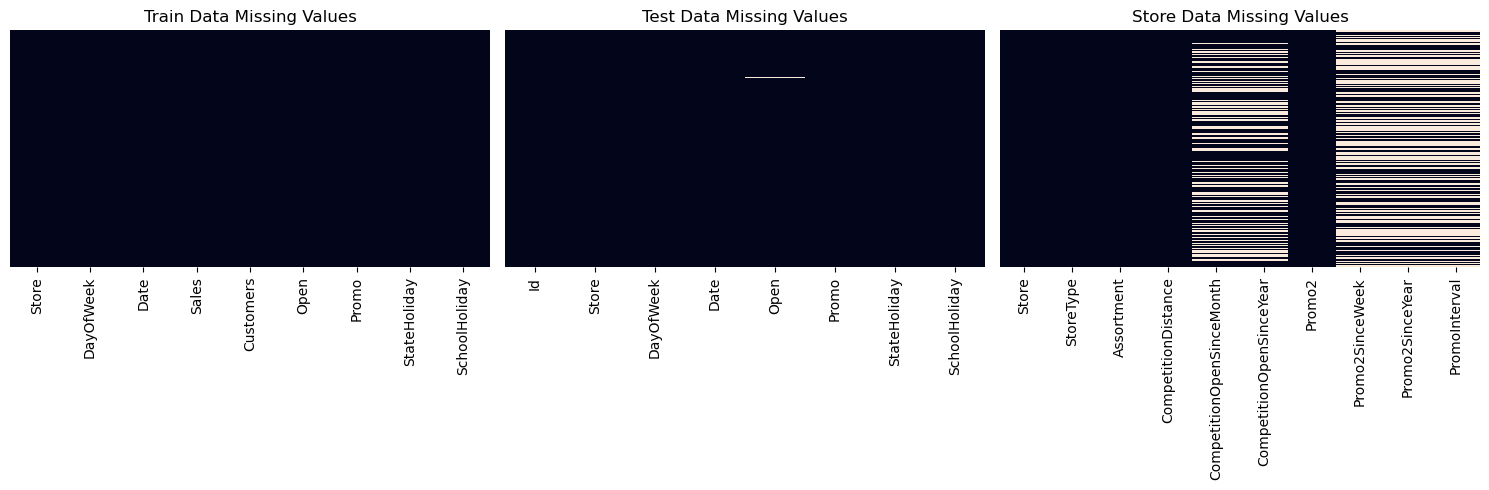

In [20]:
# Visualizing missing values
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(rossman_df_train.isnull(), cbar=False, ax=ax[0], yticklabels=False)
sns.heatmap(rossman_df_test.isnull(), cbar=False, ax=ax[1], yticklabels=False)
sns.heatmap(rossman_df_store.isnull(), cbar=False, ax=ax[2], yticklabels=False)
ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')
ax[2].set_title('Store Data Missing Values')
plt.tight_layout()

In [21]:
# Replacing missing values in test data 'Open' column with 0
rossman_df_test['Open'] = rossman_df_test['Open'].fillna(0)

In [22]:
# For CompetitionDistance (just a few missing values)
rossman_df_store['CompetitionDistance'] = rossman_df_store['CompetitionDistance'].fillna(rossman_df_store['CompetitionDistance'].median())

# For Competition date variables - assuming no competition when missing
rossman_df_store['HasCompetition'] = rossman_df_store['CompetitionOpenSinceMonth'].notna().astype(int)

# Filling missing values with reasonable defaults
max_year = rossman_df_store['CompetitionOpenSinceYear'].max()
rossman_df_store['CompetitionOpenSinceYear'] = rossman_df_store['CompetitionOpenSinceYear'].fillna(max_year + 1)
rossman_df_store['CompetitionOpenSinceMonth'] = rossman_df_store['CompetitionOpenSinceMonth'].fillna(1)

# For Promo2 variables - no need to fill these, but we could create derived features
# These are structurally missing - only stores participating in Promo2 have these values
rossman_df_store['PromoInterval'] = rossman_df_store['PromoInterval'].fillna('None')
rossman_df_store['Promo2SinceWeek'] = rossman_df_store['Promo2SinceWeek'].fillna(0)
rossman_df_store['Promo2SinceYear'] = rossman_df_store['Promo2SinceYear'].fillna(0)

rossman_df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
HasCompetition               0
dtype: int64

### Online Retail II

In [23]:
# Join `online_retail_df_year1` and `online_retail_df_year2`
online_retail_df = pd.concat([online_retail_df_year1, online_retail_df_year2], ignore_index=True)
online_retail_df['InvoiceDate'] = pd.to_datetime(online_retail_df['InvoiceDate'])
online_retail_df['Year'] = online_retail_df['InvoiceDate'].dt.year
online_retail_df['Month'] = online_retail_df['InvoiceDate'].dt.month
online_retail_df['Day'] = online_retail_df['InvoiceDate'].dt.day
online_retail_df['Week'] = online_retail_df['InvoiceDate'].dt.isocalendar().week

online_retail_df['DayOfWeek'] = online_retail_df['InvoiceDate'].dt.dayofweek
online_retail_df['Year'] = online_retail_df['Year'].astype(int)
online_retail_df['Month'] = online_retail_df['Month'].astype(int)
online_retail_df['Day'] = online_retail_df['Day'].astype(int)
online_retail_df['Week'] = online_retail_df['Week'].astype(int)
online_retail_df['DayOfWeek'] = online_retail_df['DayOfWeek'].astype(int)

In [24]:
print(online_retail_df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
Year                0
Month               0
Day                 0
Week                0
DayOfWeek           0
dtype: int64


In [25]:
# Description column - replace with "Unknown Item" or drop
online_retail_df['Description'] = online_retail_df['Description'].fillna('Unknown Item')

# Create a category for unknown customers
unknown_customer_id = -1  # Special ID for unknown customers
online_retail_df['Customer ID'] = online_retail_df['Customer ID'].fillna(unknown_customer_id)
online_retail_df['Customer ID'] = online_retail_df['Customer ID'].astype('object')

In [26]:
# Remove entries with negative quantities or zero prices
online_retail_df = online_retail_df[online_retail_df['Quantity'] > 0]
online_retail_df = online_retail_df[online_retail_df['Price'] > 0]

In [27]:
online_retail_df['TotalAmount'] = online_retail_df['Quantity'] * online_retail_df['Price']
online_retail_df['Invoice'] = online_retail_df['Invoice'].astype(str)
online_retail_df['Country'] = online_retail_df['Country'].astype(str)
online_retail_df['StockCode'] = online_retail_df['StockCode'].astype(str)
online_retail_df['Description'] = online_retail_df['Description'].astype(str)

In [28]:
print(online_retail_df.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Year           0
Month          0
Day            0
Week           0
DayOfWeek      0
TotalAmount    0
dtype: int64


In [29]:
online_retail_df.drop_duplicates(keep='first', inplace=True)

In [30]:
print("DataFrame Information:")
print(online_retail_df.info())
print("\nUnique values")
print(online_retail_df.nunique())
print("\nSummary Statistics:")
print(online_retail_df.describe())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1007914 entries, 0 to 1067370
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1007914 non-null  object        
 1   StockCode    1007914 non-null  object        
 2   Description  1007914 non-null  object        
 3   Quantity     1007914 non-null  int64         
 4   InvoiceDate  1007914 non-null  datetime64[ns]
 5   Price        1007914 non-null  float64       
 6   Customer ID  1007914 non-null  object        
 7   Country      1007914 non-null  object        
 8   Year         1007914 non-null  int64         
 9   Month        1007914 non-null  int64         
 10  Day          1007914 non-null  int64         
 11  Week         1007914 non-null  int64         
 12  DayOfWeek    1007914 non-null  int64         
 13  TotalAmount  1007914 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), obje

## Exploratory Data Analysis
### Rossman Store Sales
##### `rossman_df_train`

<Axes: xlabel='Open', ylabel='count'>

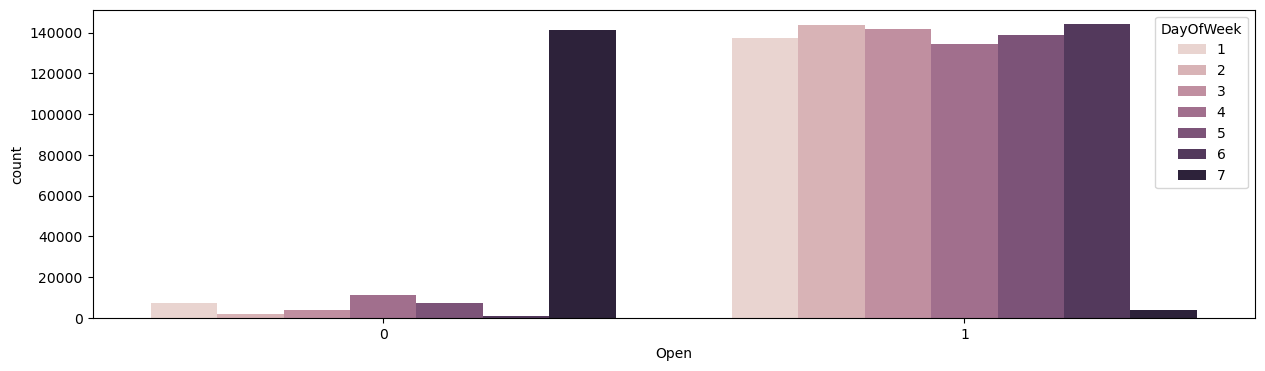

In [31]:
fig, ax = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=rossman_df_train, ax=ax)
# Open = 0 means closed, Open = 1 means open

In [32]:
rossman_df_train['Date'] = pd.to_datetime(rossman_df_train['Date'])
rossman_df_train['Year'] = rossman_df_train['Date'].dt.year
rossman_df_train['Month'] = rossman_df_train['Date'].dt.month
rossman_df_train['Day'] = rossman_df_train['Date'].dt.day
rossman_df_train['Week'] = rossman_df_train['Date'].dt.isocalendar().week
rossman_df_train['DayOfWeek'] = rossman_df_train['Date'].dt.dayofweek

rossman_df_train['Year'] = rossman_df_train['Year'].astype(int)
rossman_df_train['Month'] = rossman_df_train['Month'].astype(int)
rossman_df_train['Day'] = rossman_df_train['Day'].astype(int)
rossman_df_train['Week'] = rossman_df_train['Week'].astype(int)
rossman_df_train['DayOfWeek'] = rossman_df_train['DayOfWeek'].astype(int)


Text(120.72222222222221, 0.5, 'Day')

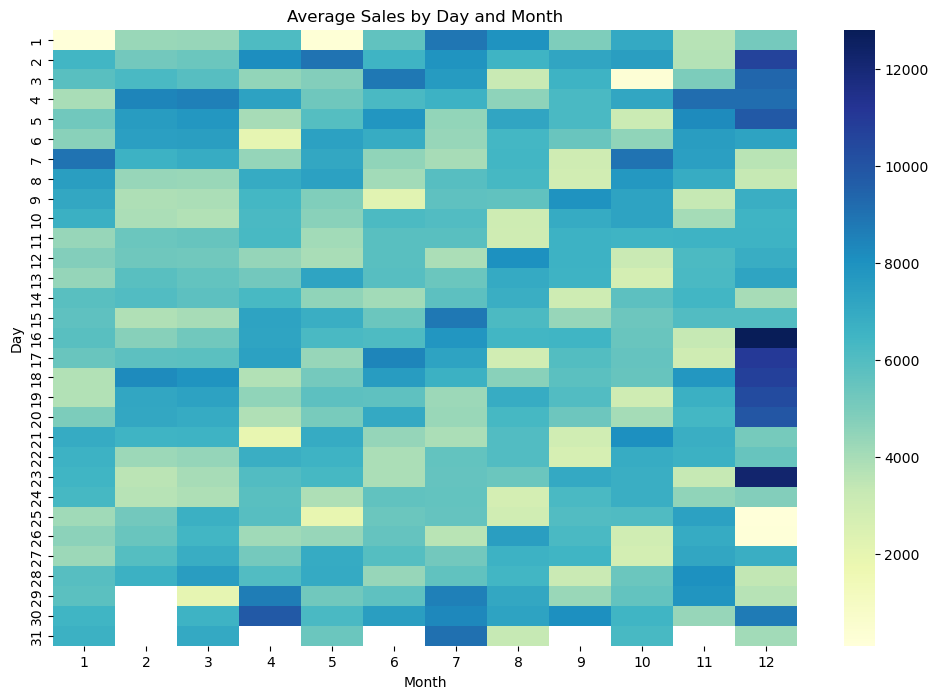

In [33]:
rossman_df_train['Month'] = rossman_df_train['Date'].dt.month
rossman_df_train['Day'] = rossman_df_train['Date'].dt.day
sales_pivot = rossman_df_train.pivot_table(index='Day', columns='Month', values='Sales', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=False)
plt.title('Average Sales by Day and Month')
plt.xlabel('Month')
plt.ylabel('Day')

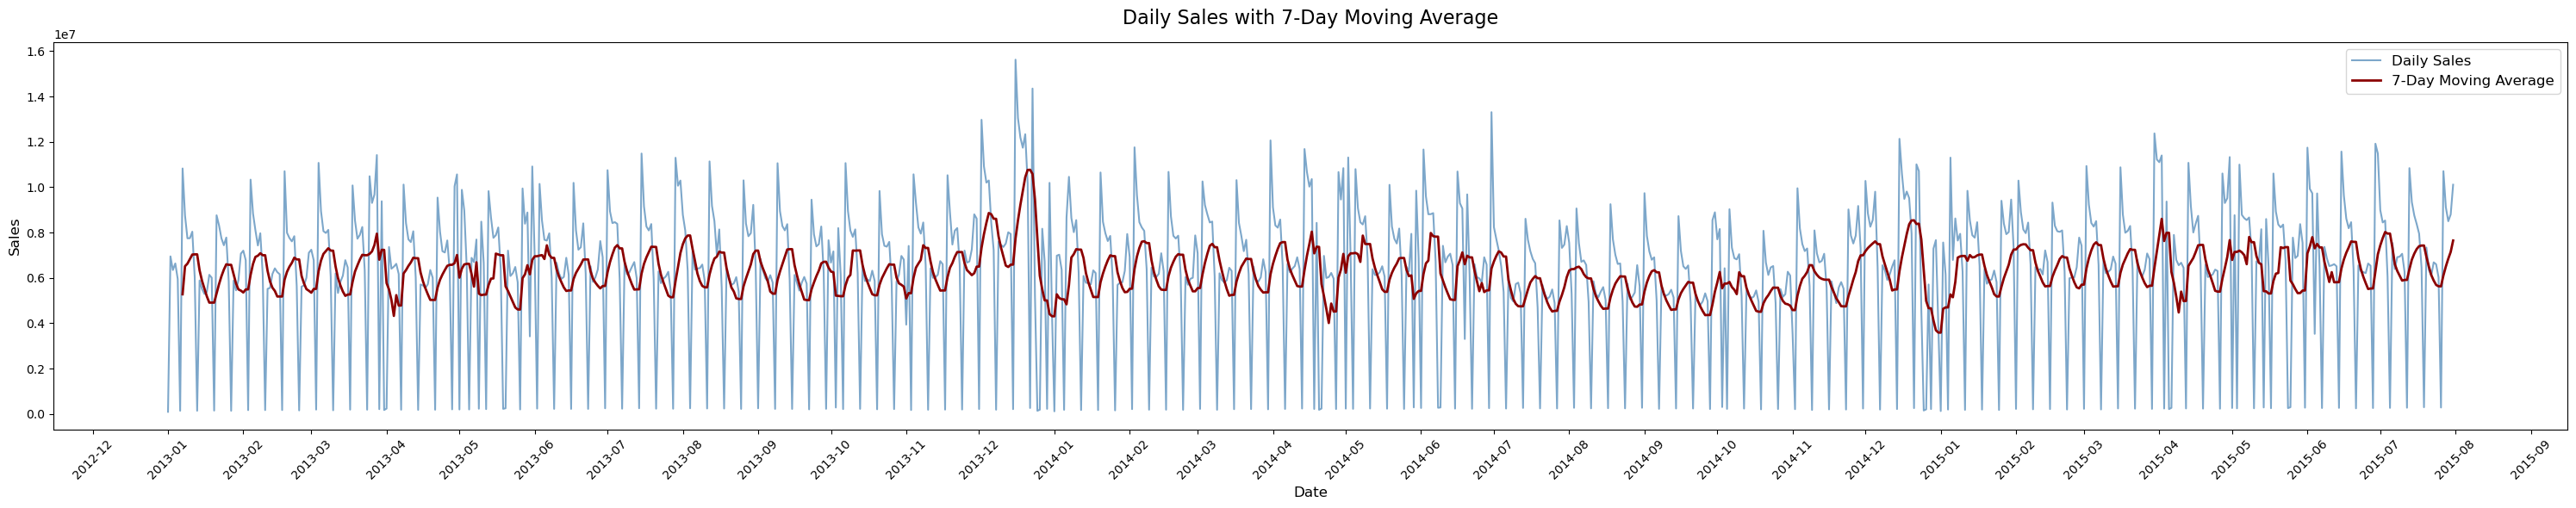

In [34]:
rossman_df_train.set_index('Date', inplace=True)
daily_sales = rossman_df_train['Sales'].resample('D').sum()
rolling_sales = daily_sales.rolling(window=7, center=False).mean()
rossman_df_train.reset_index(inplace=True)

# Create a figure and axis
plt.figure(figsize=(30, 6))
plt.plot(daily_sales.index, daily_sales.values, color='steelblue', alpha=0.7, linewidth=1.5, label='Daily Sales')
plt.plot(rolling_sales.index, rolling_sales.values, color='darkred', linewidth=2, label='7-Day Moving Average')
plt.title('Daily Sales with 7-Day Moving Average', fontsize=16, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [35]:
rossman_df_train['Date'] = pd.to_datetime(rossman_df_train['Year'].astype(str) + '-' + rossman_df_train['Month'].astype(str))

average_sales = rossman_df_train.groupby('Date')["Sales"].mean()
sales_change = rossman_df_train.groupby('Date')["Sales"].sum().pct_change() # Goes by percentage

sales_change_df = sales_change.reset_index()
sales_change_df.columns = ['Date', 'Sales Change']

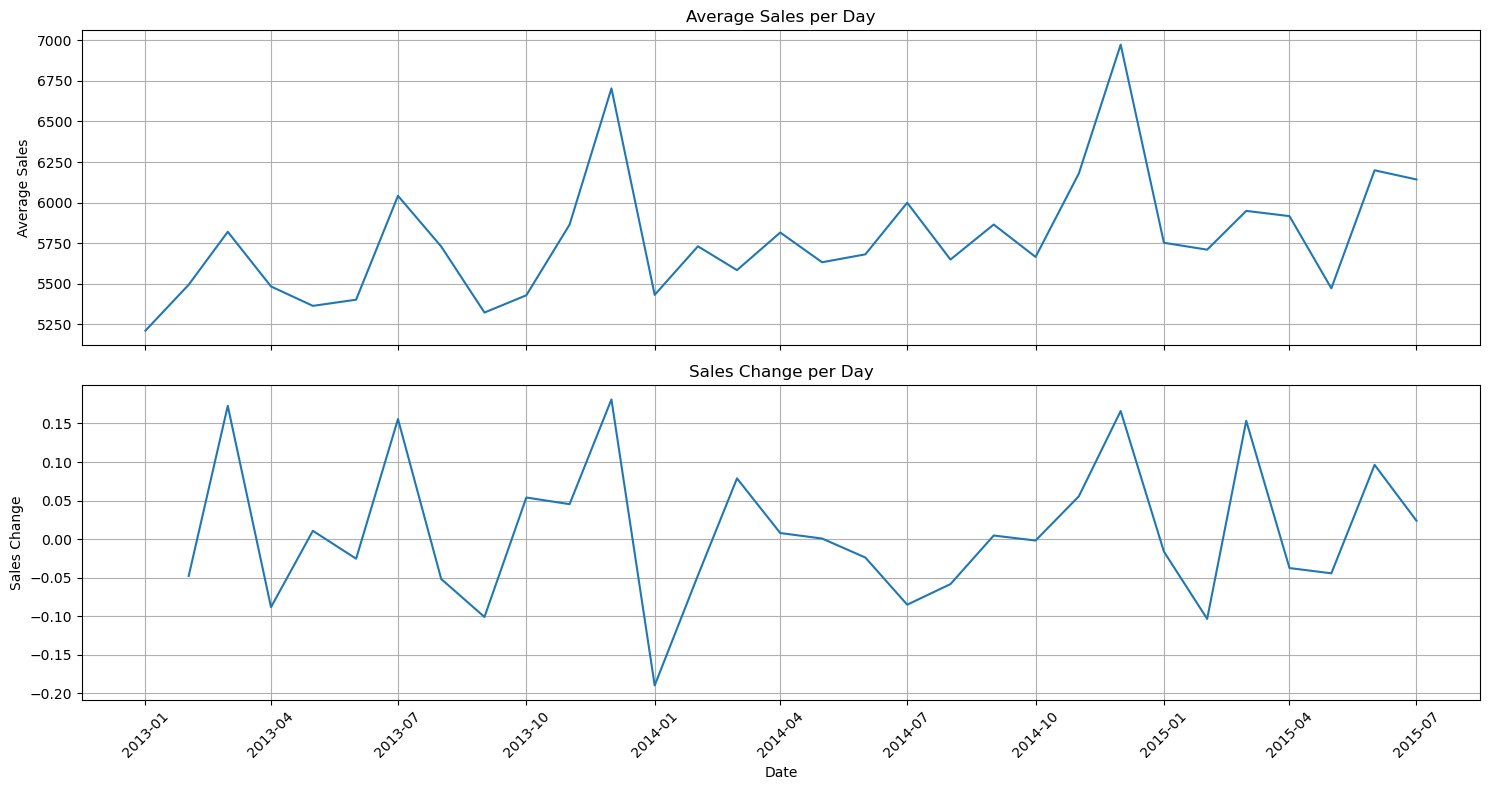

In [36]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,8))
sns.lineplot(data=average_sales, ax=ax[0])
ax[0].set_title('Average Sales per Day')
ax[0].set_ylabel('Average Sales')
ax[0].grid(True)
sns.lineplot(data=sales_change_df, x='Date', y='Sales Change', ax=ax[1])
ax[1].set_title('Sales Change per Day')
ax[1].set_ylabel('Sales Change')
ax[1].grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

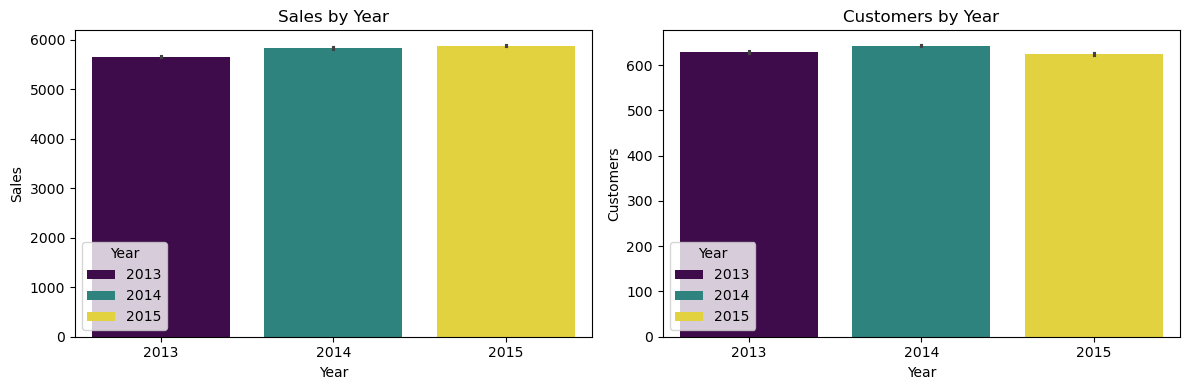

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='Year', y='Sales', data=rossman_df_train, ax=ax[0], hue='Year', palette='viridis')
ax[0].set_title('Sales by Year')
ax[0].set_ylabel('Sales')
ax[0].set_xlabel('Year')
sns.barplot(x='Year', y='Customers', data=rossman_df_train, ax=ax[1], hue='Year', palette='viridis')
ax[1].set_title('Customers by Year')
ax[1].set_ylabel('Customers')
ax[1].set_xlabel('Year')
plt.tight_layout()

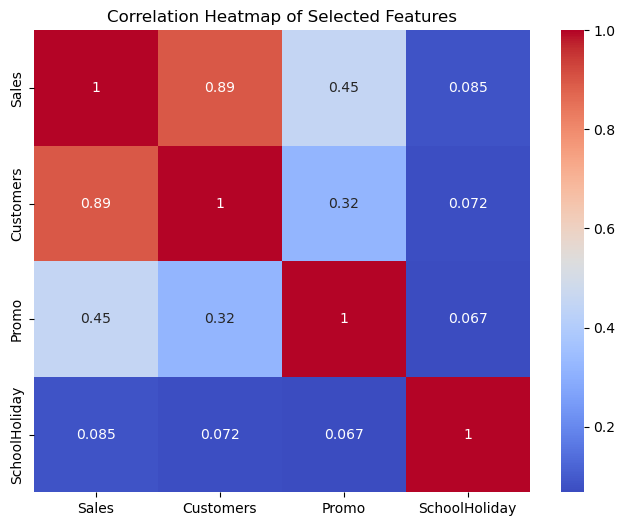

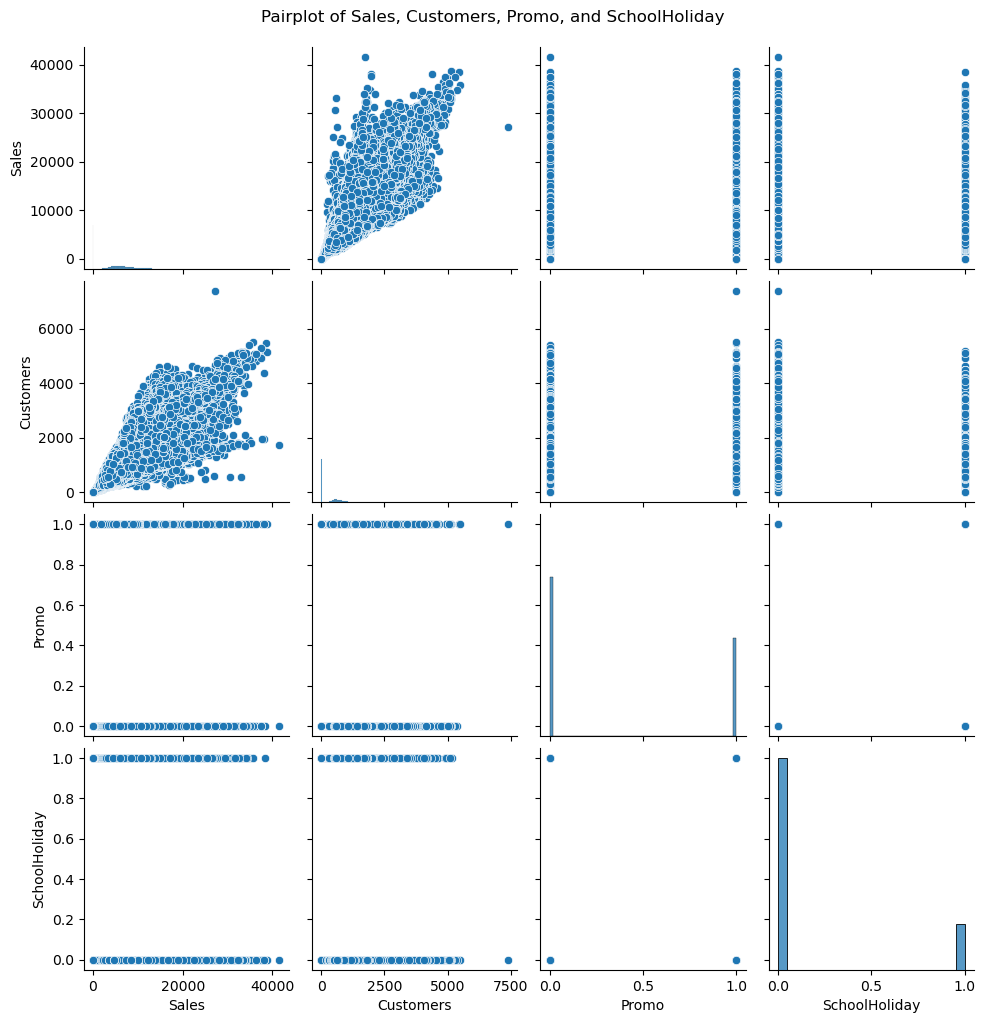

In [38]:
features = ['Sales', 'Customers', 'Promo', 'SchoolHoliday']
corr_matrix = rossman_df_train[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# Pairplot to visualize bivariate relationships
sns.pairplot(rossman_df_train[features])
plt.suptitle('Pairplot of Sales, Customers, Promo, and SchoolHoliday', y=1.02)
plt.show()

Text(0, 0.5, 'Total Sales')

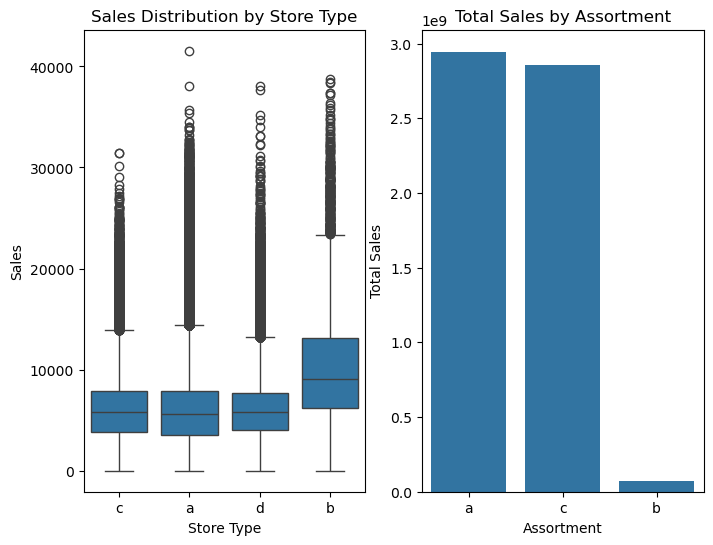

In [39]:
merged_df = pd.merge(rossman_df_train, rossman_df_store, on='Store', how='left')

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
# Boxplot of Sales by Store Type
sns.boxplot(x='StoreType', y='Sales', data=merged_df, ax=ax[0])
ax[0].set_title('Sales Distribution by Store Type')
ax[0].set_xlabel('Store Type')
ax[0].set_ylabel('Sales')
# Barplot: Total Sales by Assortment Category
sns.barplot(x='Assortment', y='Sales', data=merged_df, estimator=sum, errorbar=None, ax=ax[1])
ax[1].set_title('Total Sales by Assortment')
ax[1].set_xlabel('Assortment')
ax[1].set_ylabel('Total Sales')

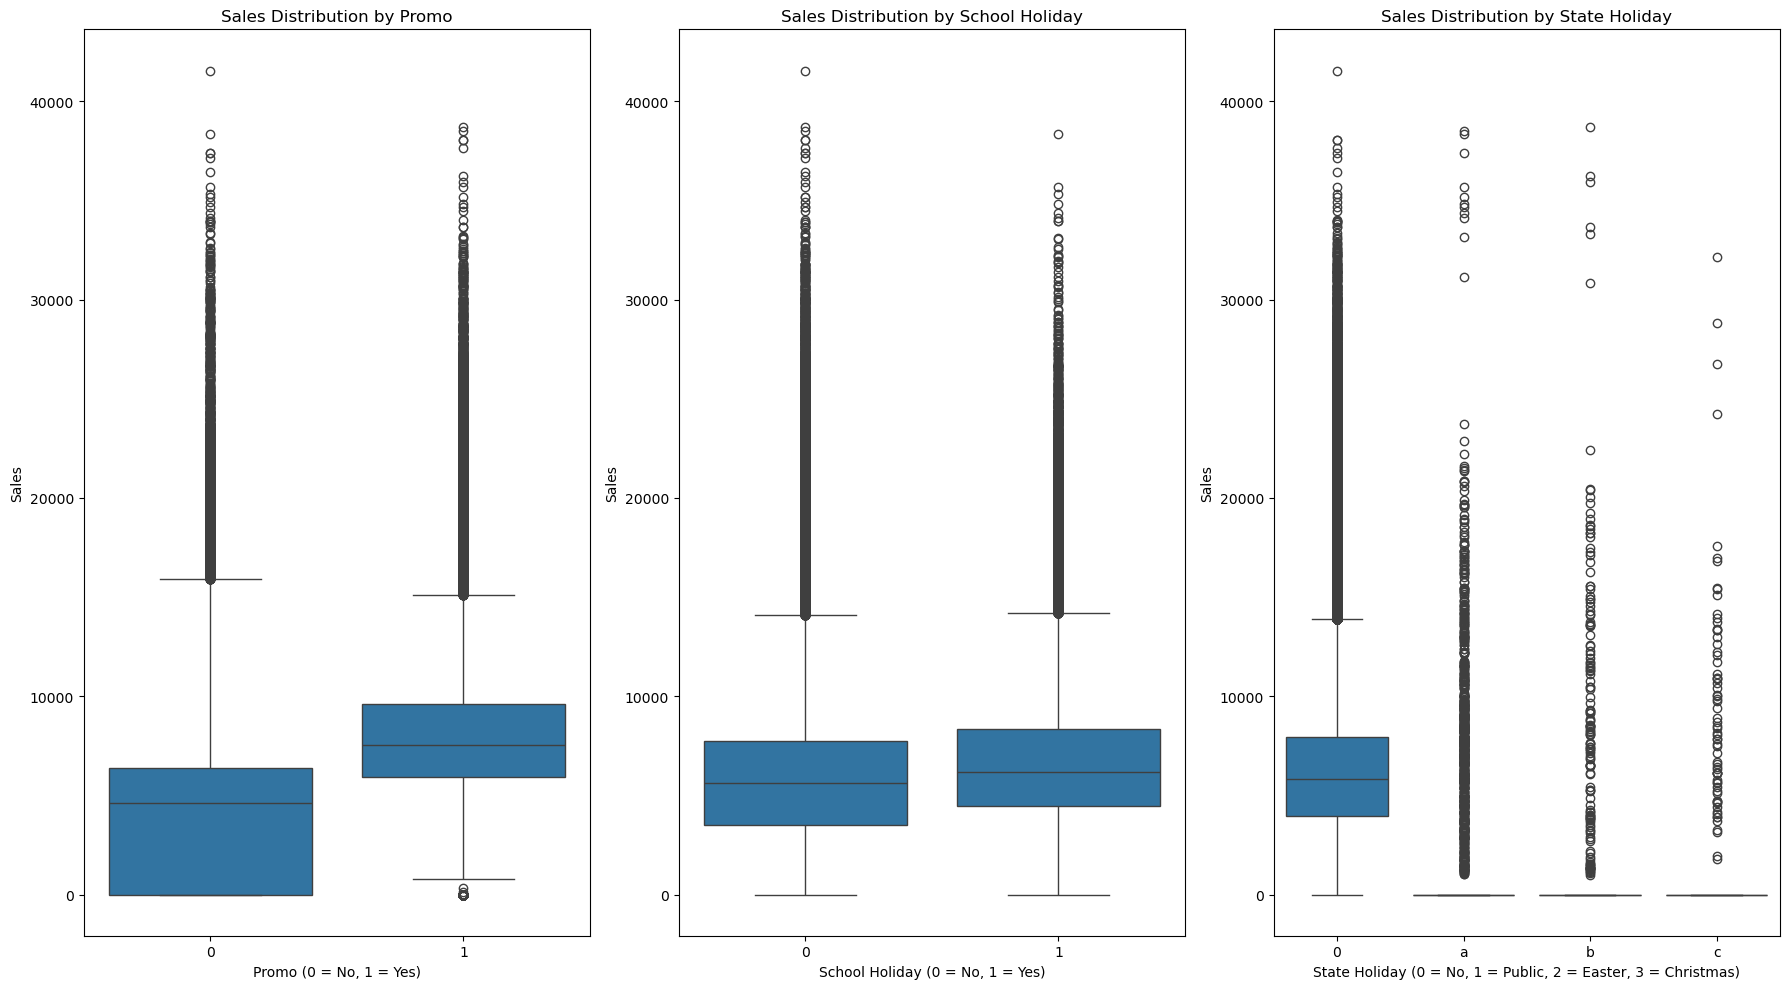

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(18, 10))
sns.boxplot(x='Promo', y='Sales', data=rossman_df_train, ax=ax[0])
ax[0].set_title('Sales Distribution by Promo')
ax[0].set_xlabel('Promo (0 = No, 1 = Yes)')
ax[0].set_ylabel('Sales')

sns.boxplot(x='SchoolHoliday', y='Sales', data=rossman_df_train, ax=ax[1])
ax[1].set_title('Sales Distribution by School Holiday')
ax[1].set_xlabel('School Holiday (0 = No, 1 = Yes)')
ax[1].set_ylabel('Sales')

sns.boxplot(x='StateHoliday', y='Sales', data=rossman_df_train, ax=ax[2])
ax[2].set_title('Sales Distribution by State Holiday')
ax[2].set_xlabel('State Holiday (0 = No, 1 = Public, 2 = Easter, 3 = Christmas)')
ax[2].set_ylabel('Sales')
plt.tight_layout()

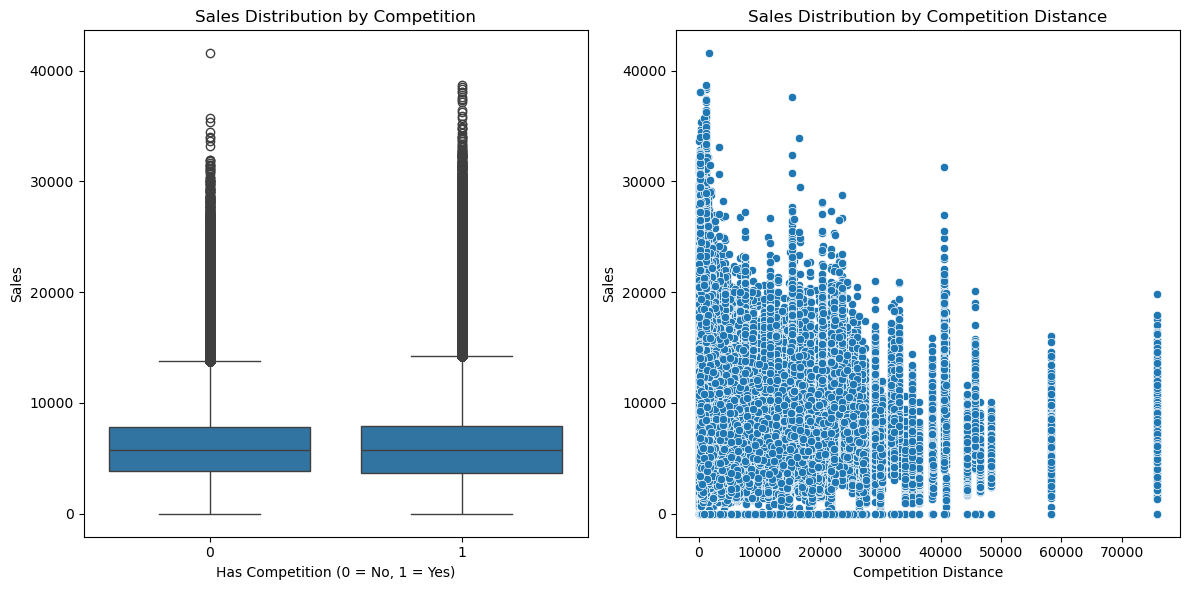

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='HasCompetition', y='Sales', data=merged_df, ax=ax[0])
ax[0].set_title('Sales Distribution by Competition')
ax[0].set_xlabel('Has Competition (0 = No, 1 = Yes)')
ax[0].set_ylabel('Sales')
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_df, ax=ax[1])
ax[1].set_title('Sales Distribution by Competition Distance')
ax[1].set_xlabel('Competition Distance')
ax[1].set_ylabel('Sales')
plt.tight_layout()

Text(0, 0.5, 'Frequency')

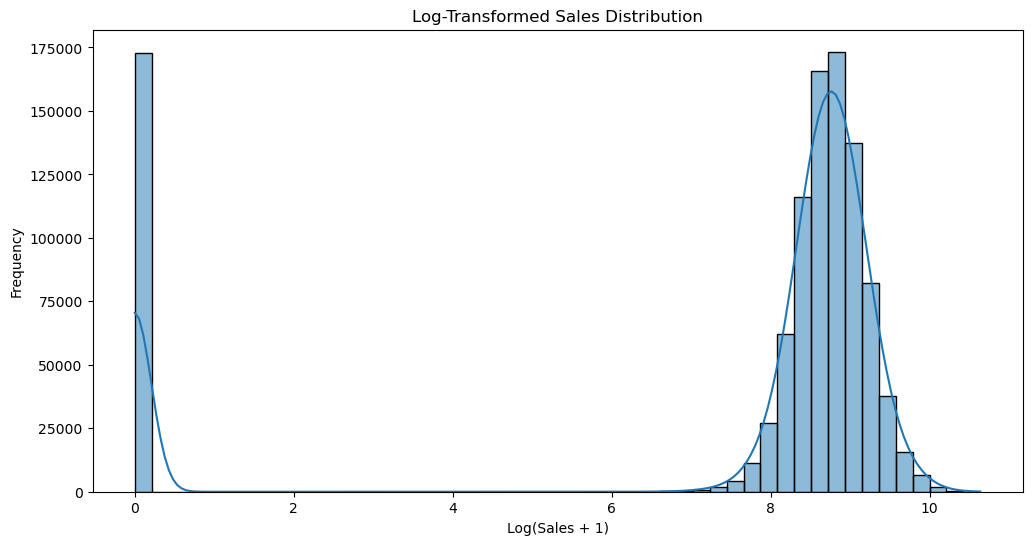

In [42]:
rossman_df_train['Log_Sales'] = np.log1p(rossman_df_train['Sales'])
plt.figure(figsize=(12, 6))
sns.histplot(rossman_df_train['Log_Sales'], bins=50, kde=True)
plt.title('Log-Transformed Sales Distribution')
plt.xlabel('Log(Sales + 1)')
plt.ylabel('Frequency')

Original data size: 1017209
Filtered data size: 990515


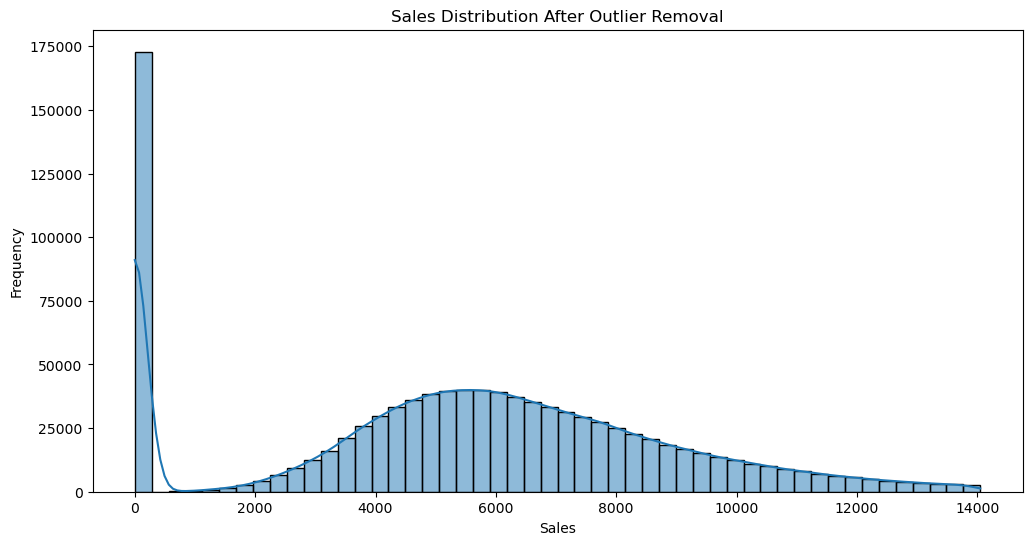

In [43]:
Q1 = rossman_df_train['Sales'].quantile(0.25)
Q3 = rossman_df_train['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = rossman_df_train[(rossman_df_train['Sales'] >= lower_bound) & (rossman_df_train['Sales'] <= upper_bound)]
print(f"Original data size: {rossman_df_train.shape[0]}")
print(f"Filtered data size: {filtered_df.shape[0]}")

plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution After Outlier Removal')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

##### `rossman_df_test`

In [44]:
# Date conversion and feature extraction
rossman_df_test['Date'] = pd.to_datetime(rossman_df_test['Date'])
rossman_df_test['Year'] = rossman_df_test['Date'].dt.year
rossman_df_test['Month'] = rossman_df_test['Date'].dt.month
rossman_df_test['Day'] = rossman_df_test['Date'].dt.day
rossman_df_test['Week'] = rossman_df_test['Date'].dt.isocalendar().week
rossman_df_test['DayOfWeek'] = rossman_df_test['Date'].dt.dayofweek

rossman_df_test['Year'] = rossman_df_test['Year'].astype(int)
rossman_df_test['Month'] = rossman_df_test['Month'].astype(int)
rossman_df_test['Day'] = rossman_df_test['Day'].astype(int)
rossman_df_test['Week'] = rossman_df_test['Week'].astype(int)
rossman_df_test['DayOfWeek'] = rossman_df_test['DayOfWeek'].astype(int)

# Convert categorical features
rossman_df_test['StateHoliday'] = rossman_df_test['StateHoliday'].astype(str)

# Merge with store information for additional features
rossman_df_test_merged = pd.merge(rossman_df_test, rossman_df_store, on='Store', how='left')
rossman_df_test_merged['StateHoliday'] = rossman_df_test_merged['StateHoliday'].astype(str)


##### `rossman_df_store`

In [45]:
# Merge rossman_df_store with average store sales & customers
store_sales = rossman_df_train.groupby('Store')['Sales'].mean().reset_index()
store_sales.columns = ['Store', 'Avg_Sales']
store_customers = rossman_df_train.groupby('Store')['Customers'].mean().reset_index()
store_customers.columns = ['Store', 'Avg_Customers']
rossman_df_store = pd.merge(rossman_df_store, store_sales, on='Store', how='left')
rossman_df_store = pd.merge(rossman_df_store, store_customers, on='Store', how='left')

rossman_df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,HasCompetition,Avg_Sales,Avg_Customers
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,1,3945.704883,467.646497
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1,4122.991507,486.045648
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1,5741.253715,620.286624
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,None,1,8021.769639,1100.057325
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None,1,3867.110403,444.360934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,4342.968153,373.548832
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,None,1,8465.280255,693.498938
1112,1113,a,c,9260.0,1.0,2016.0,0,0.0,0.0,None,0,5516.180467,596.763270
1113,1114,a,c,870.0,1.0,2016.0,0,0.0,0.0,None,0,17200.196391,2664.057325


Text(0.5, 1.0, 'Store Types Distribution')

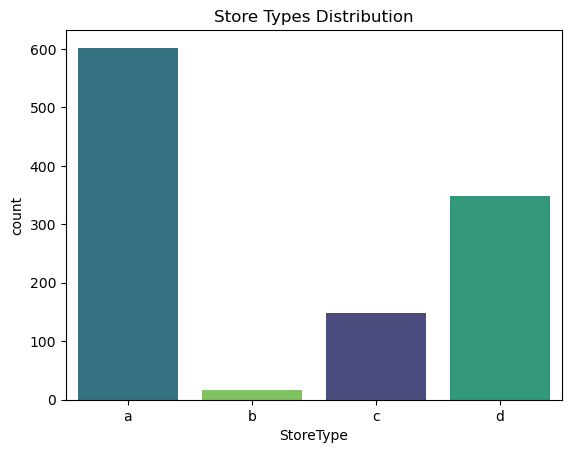

In [46]:
sns.countplot(x='StoreType', data=rossman_df_store, order=['a','b','c','d'], hue='StoreType', palette='viridis')
plt.title('Store Types Distribution')

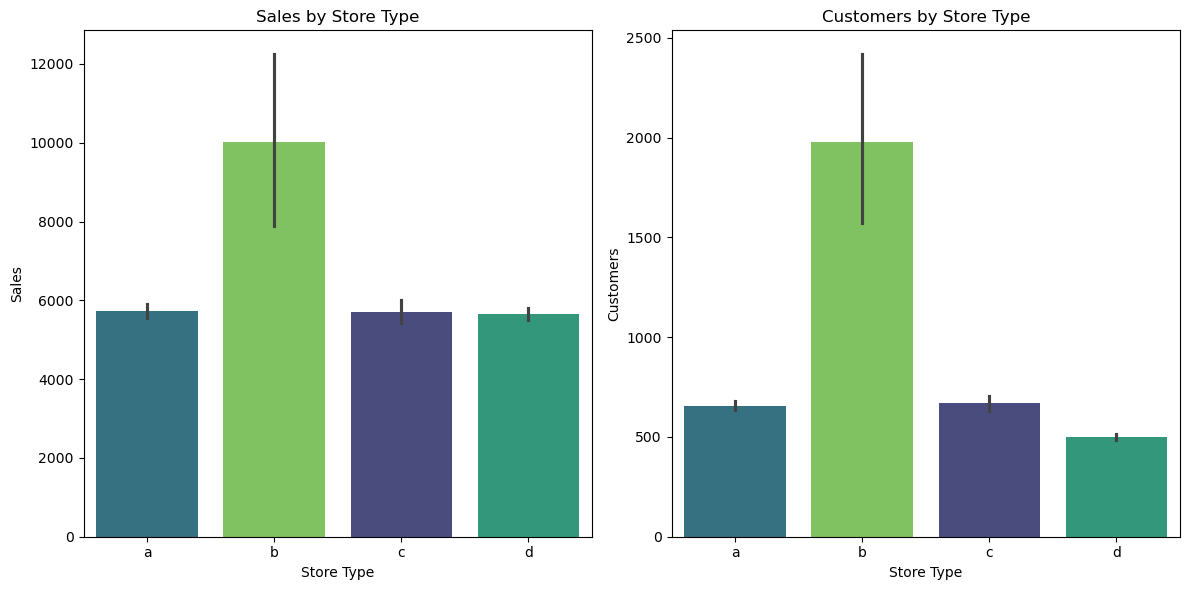

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='StoreType', y='Avg_Sales', data=rossman_df_store, order=['a','b','c', 'd'], ax=ax[0], hue='StoreType', palette='viridis')
sns.barplot(x='StoreType', y='Avg_Customers', data=rossman_df_store, order=['a','b','c', 'd'], ax=ax[1], hue='StoreType', palette='viridis')
ax[0].set_title('Sales by Store Type')
ax[0].set_xlabel('Store Type')
ax[0].set_ylabel('Sales')
ax[1].set_title('Customers by Store Type')
ax[1].set_xlabel('Store Type')
ax[1].set_ylabel('Customers')
plt.tight_layout()

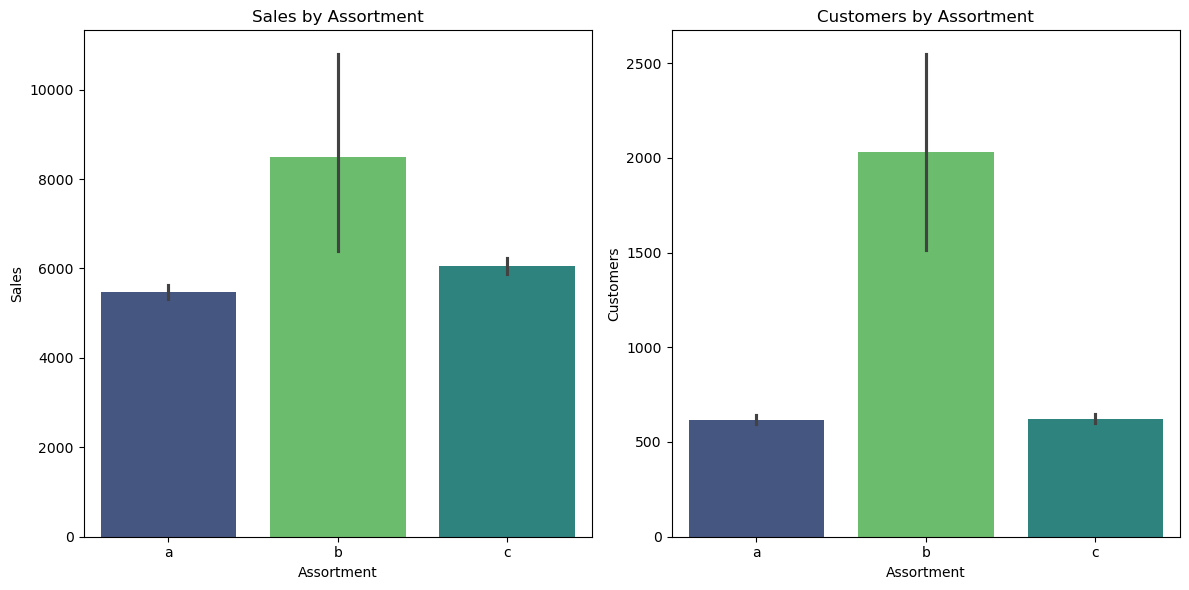

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='Assortment', y='Avg_Sales', data=rossman_df_store, order=['a','b','c'], ax=ax[0], hue='Assortment', palette='viridis')
sns.barplot(x='Assortment', y='Avg_Customers', data=rossman_df_store, order=['a','b','c'], ax=ax[1], hue='Assortment', palette='viridis')
ax[0].set_title('Sales by Assortment')
ax[0].set_xlabel('Assortment')
ax[0].set_ylabel('Sales')
ax[1].set_title('Customers by Assortment')
ax[1].set_xlabel('Assortment')
ax[1].set_ylabel('Customers')
plt.tight_layout()

<Axes: xlabel='Promo2', ylabel='Avg_Customers'>

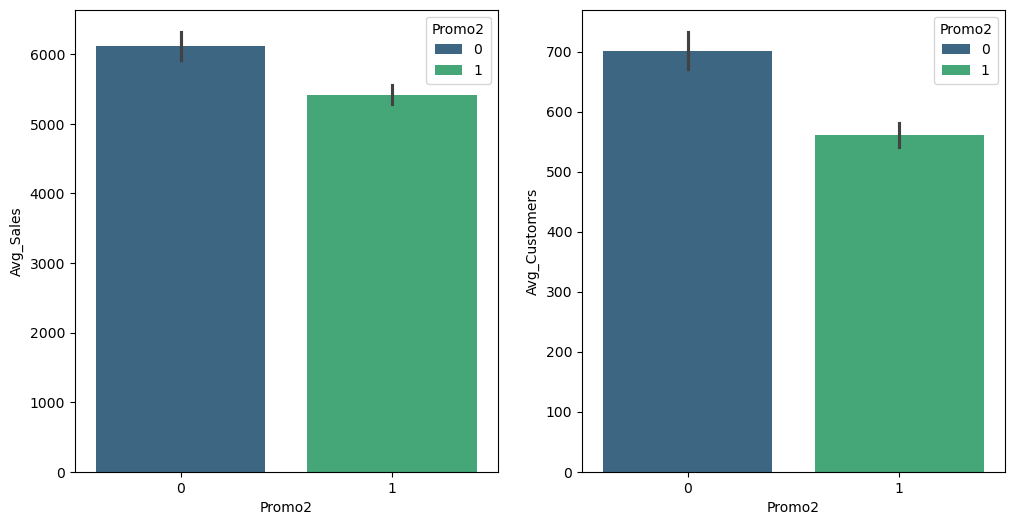

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='Promo2', y='Avg_Sales', data=rossman_df_store, ax=ax[0], hue='Promo2', palette='viridis')
sns.barplot(x='Promo2', y='Avg_Customers', data=rossman_df_store, ax=ax[1], hue='Promo2', palette='viridis')

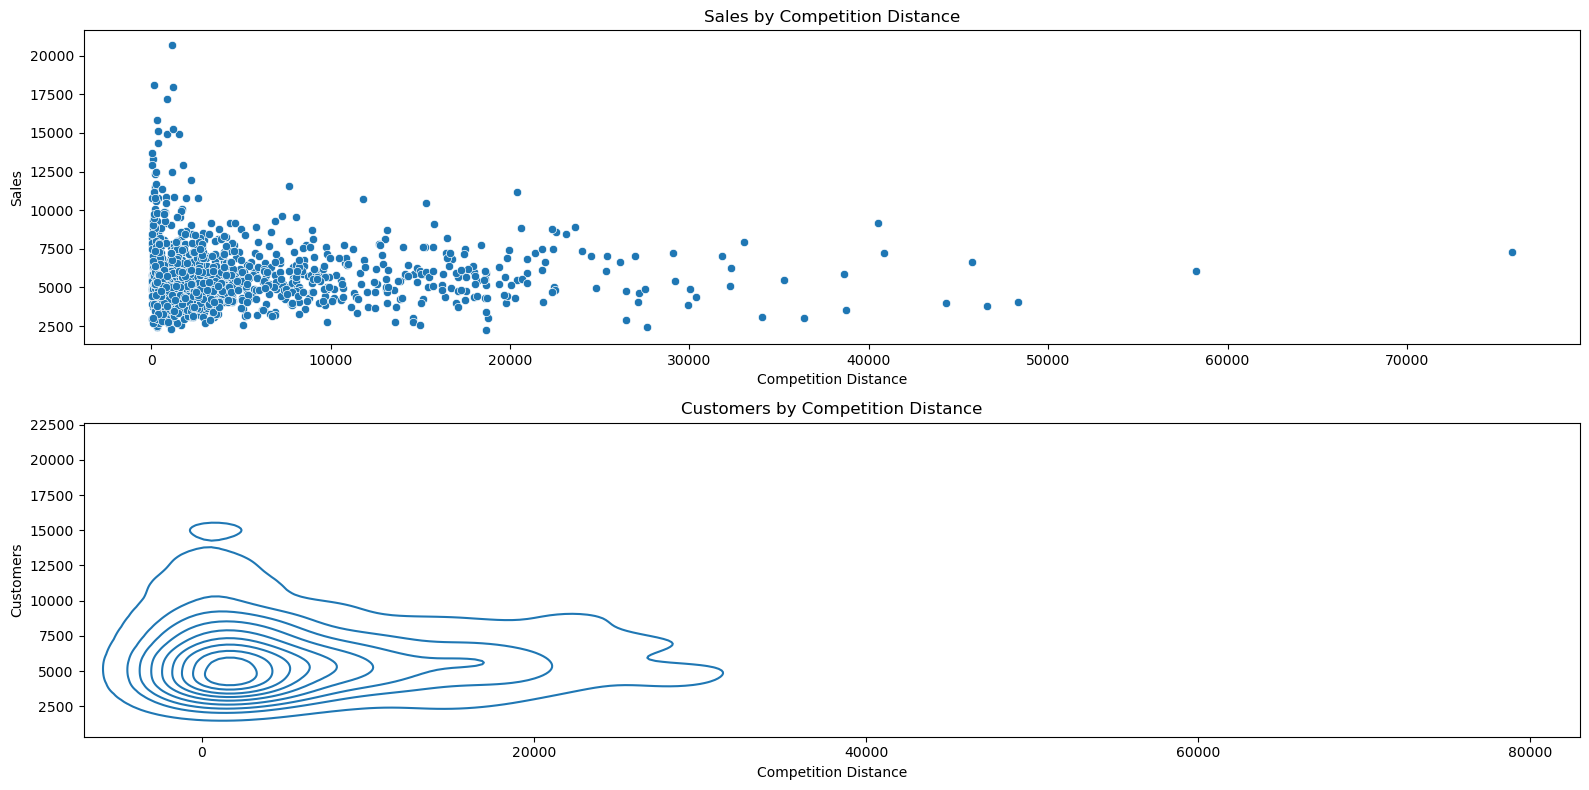

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
sns.scatterplot(x='CompetitionDistance', y='Avg_Sales', data=rossman_df_store, ax=ax[0])
ax[0].set_title('Sales by Competition Distance')
sns.kdeplot(x='CompetitionDistance', y='Avg_Sales', data=rossman_df_store, ax=ax[1])
ax[1].set_title('Customers by Competition Distance')
ax[0].set_xlabel('Competition Distance')
ax[0].set_ylabel('Sales')
ax[1].set_xlabel('Competition Distance')
ax[1].set_ylabel('Customers')
plt.tight_layout()

/var/folders/mk/cbhsfqwx6f33ymf595b79hzh0000gn/T/ipykernel_51980/3829287122.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_date_sales = rossman_df_train.groupby(['Store', pd.Grouper(key='Date', freq='M')])['Sales'].mean().reset_index()


Number of stores analyzed: 188
Average impact of competition on sales: -1.89%


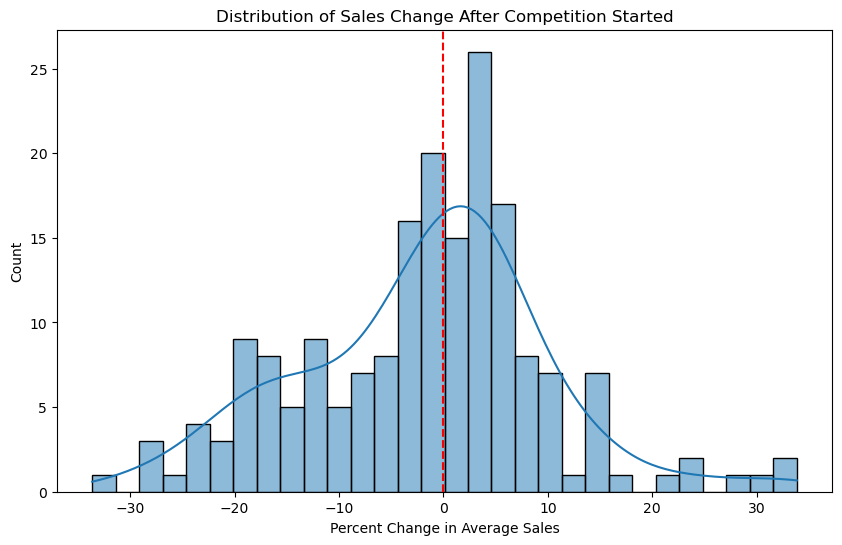


Stores with largest sales decrease after competition:
     Store  PercentChange
146    882     -33.630487
151    905     -28.584102
123    685     -28.294138
184   1086     -28.154653
142    839     -24.809743
164    983     -24.327656
113    629     -24.057099
131    770     -23.965353
93     523     -23.121274
165    986     -21.341285

Stores with largest sales increase after competition:
     Store  PercentChange
24     122      33.841347
101    560      33.418141
19     103      30.771090
141    837      27.101230
49     263      22.812393
3        8      22.762840
103    578      21.224075
67     347      17.260708
2        7      15.625976
136    801      14.910857


In [51]:
rossman_df_store['CompetitionStartDate'] = pd.to_datetime(
    rossman_df_store['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' + 
    rossman_df_store['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-01'
)

stores_with_competition = rossman_df_store[rossman_df_store['HasCompetition'] == 1]['Store'].unique()
store_date_sales = rossman_df_train.groupby(['Store', pd.Grouper(key='Date', freq='M')])['Sales'].mean().reset_index()

competition_effect = []
for store in stores_with_competition:
    start_date = rossman_df_store.loc[rossman_df_store['Store'] == store, 'CompetitionStartDate'].values[0]
    store_sales = store_date_sales[store_date_sales['Store'] == store]
    
    if len(store_sales) < 6:
        continue
    
    sales_before = store_sales[store_sales['Date'] < start_date]['Sales'].mean()
    sales_after = store_sales[store_sales['Date'] >= start_date]['Sales'].mean()
    
    if np.isnan(sales_before) or np.isnan(sales_after):
        continue
    
    # Calculate percent change
    percent_change = ((sales_after - sales_before) / sales_before) * 100
    
    competition_effect.append({
        'Store': store,
        'CompetitionStartDate': start_date,
        'AvgSalesBefore': sales_before,
        'AvgSalesAfter': sales_after,
        'PercentChange': percent_change
    })

competition_effect_df = pd.DataFrame(competition_effect)

if len(competition_effect_df) > 0:
    print(f"Number of stores analyzed: {len(competition_effect_df)}")
    print(f"Average impact of competition on sales: {competition_effect_df['PercentChange'].mean():.2f}%")
    
    plt.figure(figsize=(10, 6))
    sns.histplot(competition_effect_df['PercentChange'], kde=True, bins=30)
    plt.axvline(x=0, color='red', linestyle='--')
    plt.title('Distribution of Sales Change After Competition Started')
    plt.xlabel('Percent Change in Average Sales')
    plt.ylabel('Count')
    plt.show()
    
    # Show top 10 most affected stores (both positive and negative)
    print("\nStores with largest sales decrease after competition:")
    print(competition_effect_df.sort_values('PercentChange').head(10)[['Store', 'PercentChange']])
    
    print("\nStores with largest sales increase after competition:")
    print(competition_effect_df.sort_values('PercentChange', ascending=False).head(10)[['Store', 'PercentChange']])
else:
    print("No stores with sufficient data before and after competition start.")

   Store  Expected_Sales         Risk
0      1     3945.704883  2015.417840
1      2     4122.991507  2363.628674
2      3     5741.253715  3298.782559
3      4     8021.769639  4012.592818
4      5     3867.110403  2389.609890


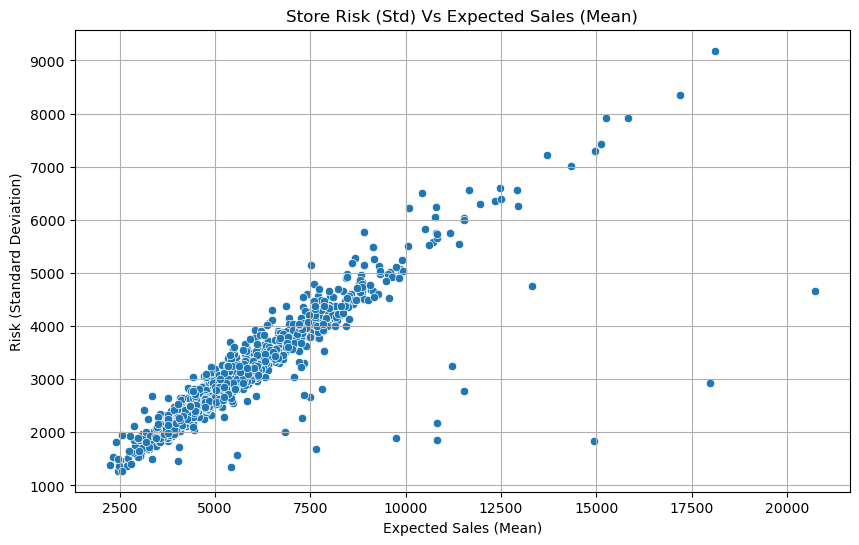

In [52]:
store_sales_stats = rossman_df_train.groupby("Store")["Sales"].agg(["mean", "std"]).reset_index()
store_sales_stats.columns = ["Store", "Expected_Sales", "Risk"]
print(store_sales_stats.head())

# Plot Risk (std) vs Expected Sales (mean)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_sales_stats, x="Expected_Sales", y="Risk")
plt.xlabel("Expected Sales (Mean)")
plt.ylabel("Risk (Standard Deviation)")
plt.title("Store Risk (Std) Vs Expected Sales (Mean)")
plt.grid(True)
plt.show()

### Online Retail II

In [53]:
online_retail_df['TotalAmount'] = online_retail_df['Quantity'] * online_retail_df['Price']
online_retail_df['TotalAmount']

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Name: TotalAmount, Length: 1007914, dtype: float64

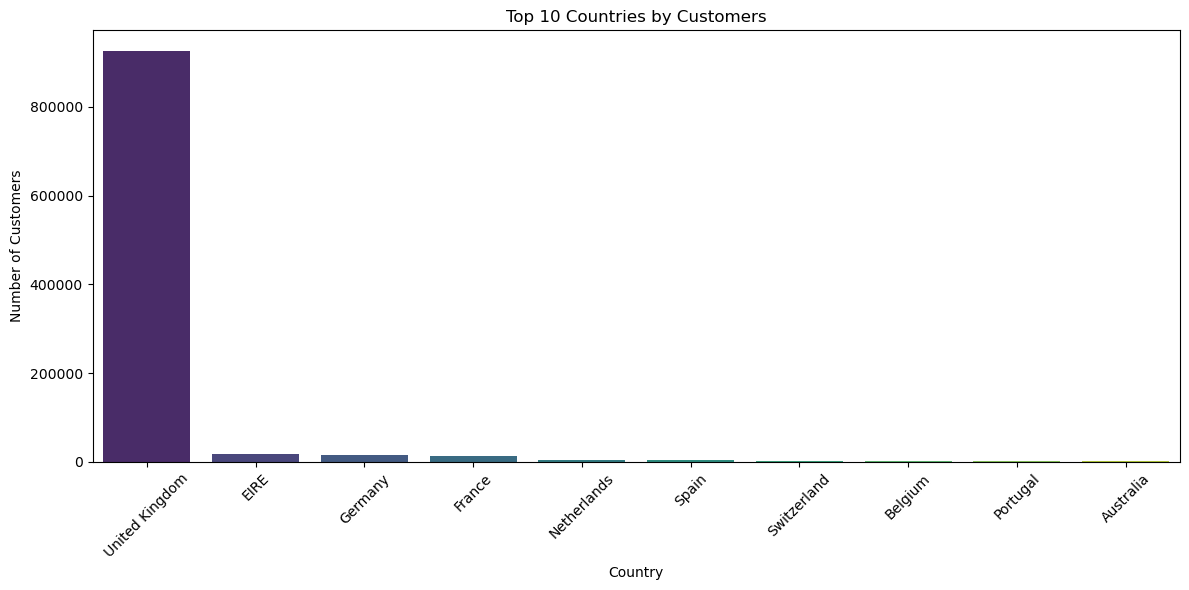

In [54]:
# Top 10 Countries by Customers
top_10_countries = online_retail_df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, hue=top_10_countries.index, palette='viridis')
plt.title('Top 10 Countries by Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

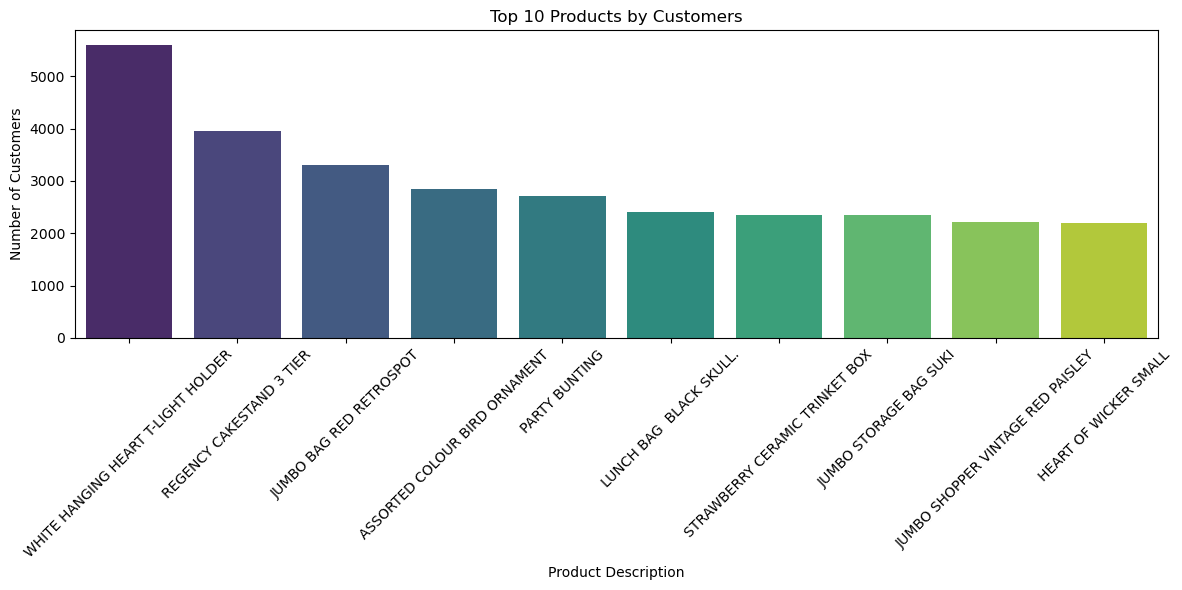

In [55]:
# Top 10 Products by Customers
top_10_products = online_retail_df['Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, hue=top_10_products.index, palette='viridis')
plt.title('Top 10 Products by Customers')
plt.xlabel('Product Description')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

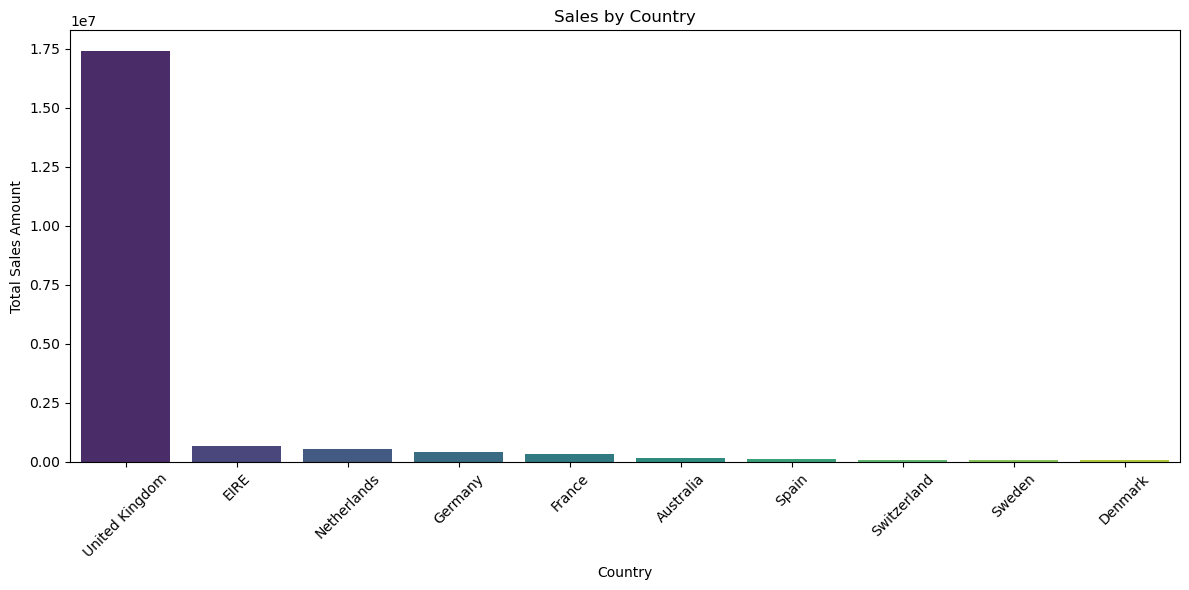

In [56]:
# Sales by Country
country_sales = online_retail_df.groupby('Country')['TotalAmount'].sum().reset_index()
country_sales = country_sales.sort_values(by='TotalAmount', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales['Country'], y=country_sales['TotalAmount'], hue=country_sales['Country'], palette='viridis')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()

In [57]:
# RFM analysis for specifcally UK customers
uk_customers = online_retail_df[online_retail_df['Country'] == 'United Kingdom']
uk_customers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Week,DayOfWeek,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,49,1,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,49,1,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,49,1,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,49,1,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,49,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011,12,9,49,4,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,49,4,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011,12,9,49,4,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011,12,9,49,4,214.8


In [58]:
uk_rfm = uk_customers.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (uk_customers['InvoiceDate'].max() - x.max()).days,
    'Invoice': 'count',
    'TotalAmount': 'sum'
}).reset_index()
uk_rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
uk_rfm['Recency'] = uk_rfm['Recency'].astype(int)
uk_rfm['Frequency'] = uk_rfm['Frequency'].astype(int)
uk_rfm['Monetary'] = uk_rfm['Monetary'].astype(float)

uk_rfm.describe()
uk_rfm.info()
uk_rfm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5351 non-null   float64
 1   Recency      5351 non-null   int64  
 2   Frequency    5351 non-null   int64  
 3   Monetary     5351 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 167.3 KB


,Customer ID,Recency,Frequency,Monetary
0,-1.0,0,225651,3021334.77
1,12346.0,325,34,77556.46
2,12608.0,404,16,415.79
3,12745.0,486,22,723.85
4,12746.0,540,17,254.55


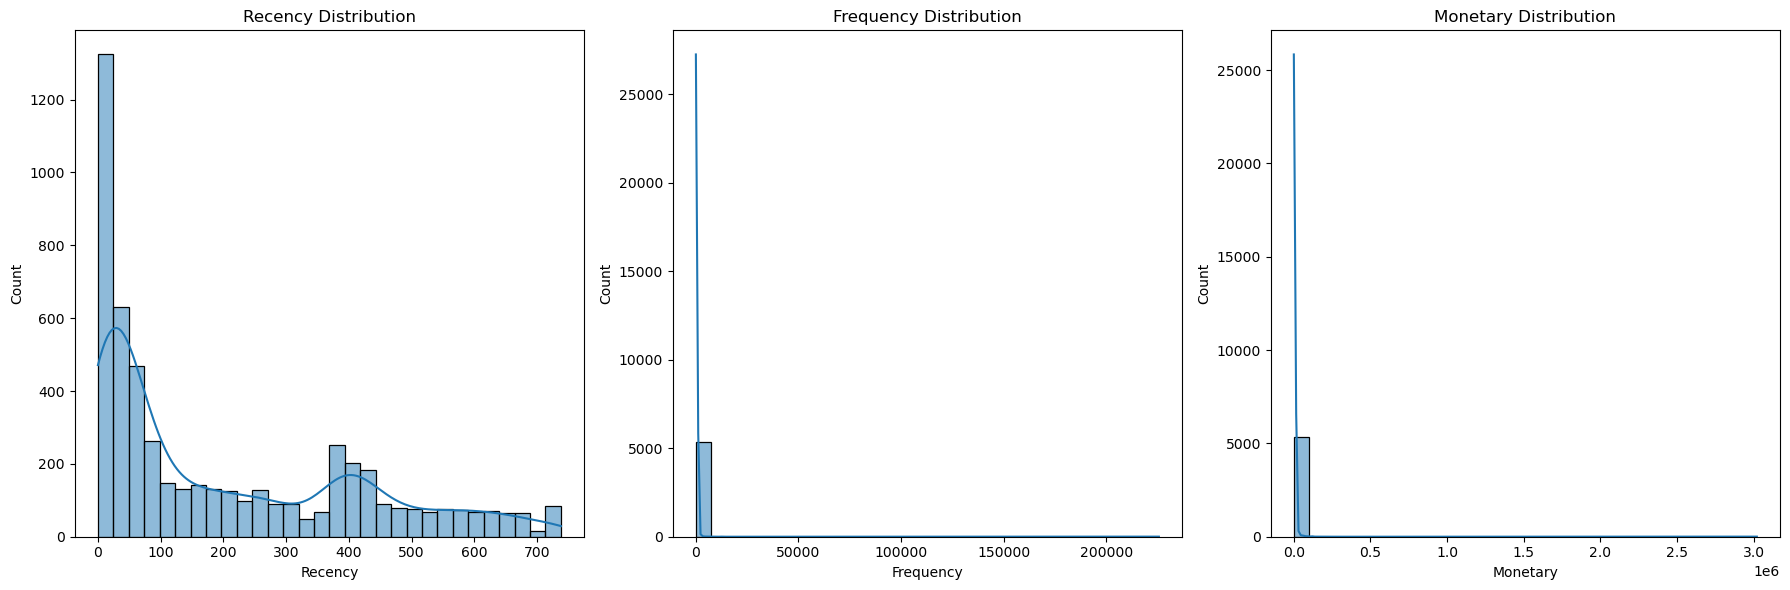

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(uk_rfm['Recency'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Recency Distribution')
sns.histplot(uk_rfm['Frequency'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Frequency Distribution')
sns.histplot(uk_rfm['Monetary'], bins=30, kde=True, ax=ax[2])
ax[2].set_title('Monetary Distribution')
plt.tight_layout()

In [60]:
uk_customers['InvoiceDate'] = pd.to_datetime(uk_customers['InvoiceDate'])
uk_customers['CohortMonth'] = uk_customers['InvoiceDate'].dt.to_period('M')

cohort_data = uk_customers.groupby('Customer ID')['CohortMonth'].min().reset_index()
cohort_data.columns = ['Customer ID', 'CohortMonth_First']

uk_customers = pd.merge(uk_customers, cohort_data, on='Customer ID', how='left')

uk_customers['OrderMonth'] = uk_customers['InvoiceDate'].dt.to_period('M')

def get_cohort_index(df):
    df['CohortIndex'] = (df['OrderMonth'].astype(str).str[:4].astype(int) - 
                        df['CohortMonth_First'].astype(str).str[:4].astype(int)) * 12 + \
                        (df['OrderMonth'].astype(str).str[5:7].astype(int) - 
                        df['CohortMonth_First'].astype(str).str[5:7].astype(int))
    return df

uk_customers = get_cohort_index(uk_customers)

cohort_size = uk_customers.groupby('CohortMonth_First')['Customer ID'].nunique()
cohort_data = uk_customers.groupby(['CohortMonth_First', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_table = cohort_data.pivot(index='CohortMonth_First', columns='CohortIndex', values='Customer ID')

cohort_table_percentage = cohort_table.divide(cohort_size, axis=0) * 100

/var/folders/mk/cbhsfqwx6f33ymf595b79hzh0000gn/T/ipykernel_51980/734654794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_customers['InvoiceDate'] = pd.to_datetime(uk_customers['InvoiceDate'])
/var/folders/mk/cbhsfqwx6f33ymf595b79hzh0000gn/T/ipykernel_51980/734654794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_customers['CohortMonth'] = uk_customers['InvoiceDate'].dt.to_period('M')


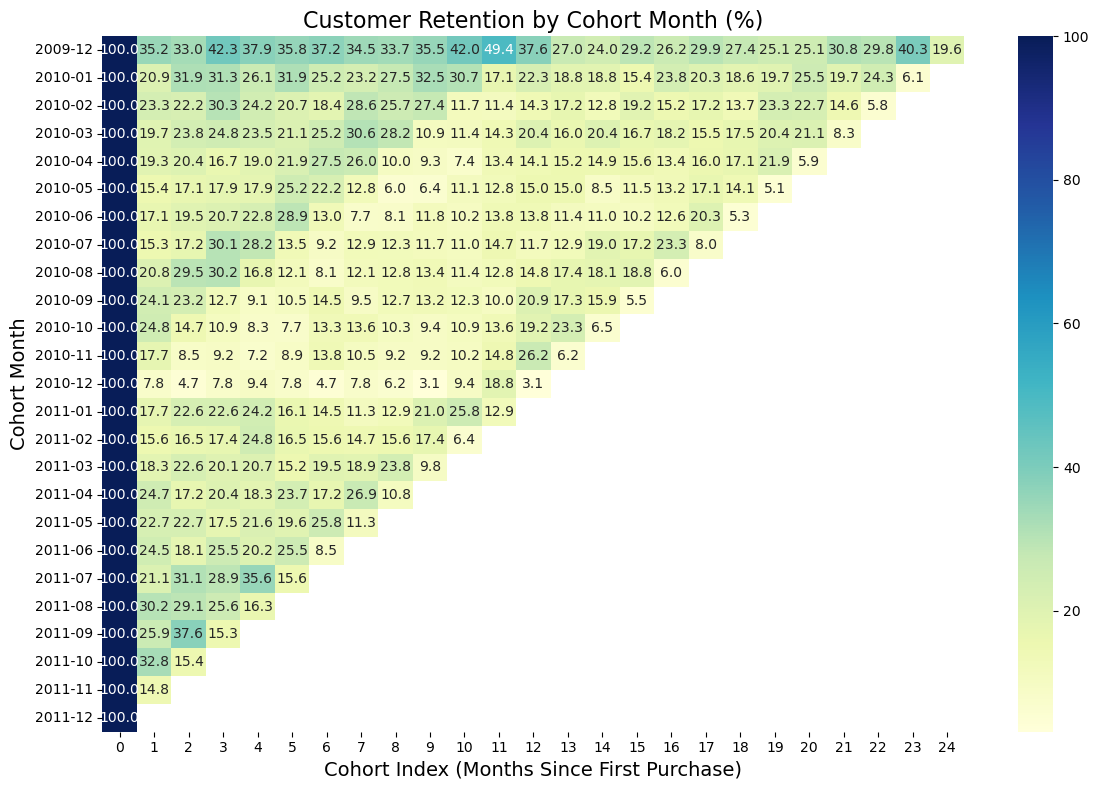

In [61]:
# Plot the cohort retention rates
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_table_percentage, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Customer Retention by Cohort Month (%)', fontsize=16)
plt.ylabel('Cohort Month', fontsize=14)
plt.xlabel('Cohort Index (Months Since First Purchase)', fontsize=14)
plt.tight_layout()

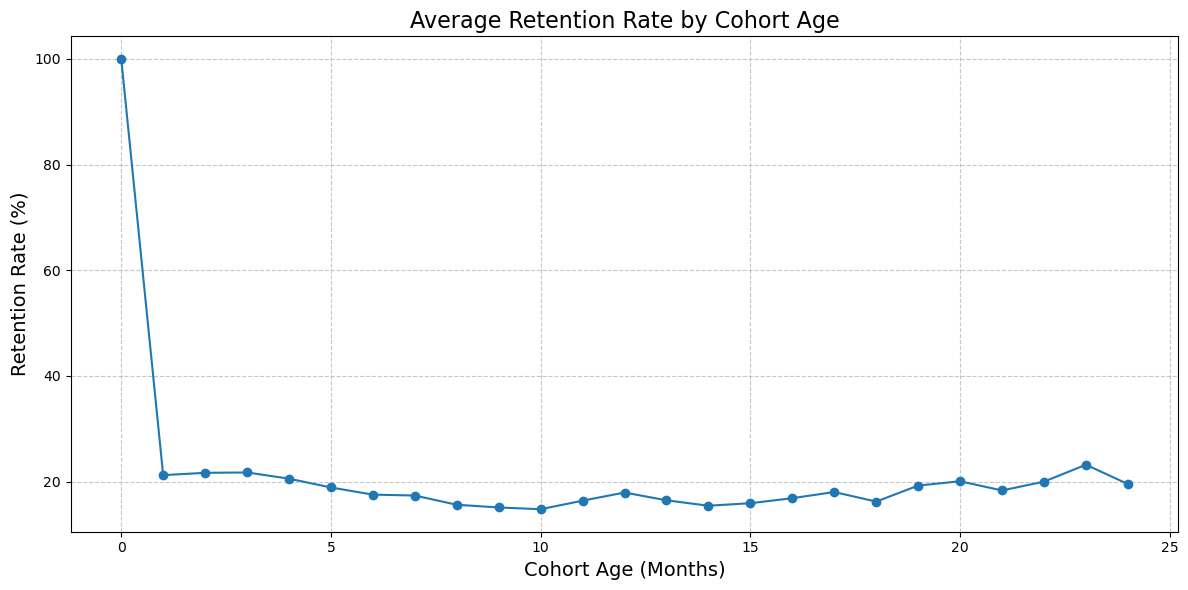

In [62]:
# Create a retention curve for average retention across cohorts
retention_avg = cohort_table_percentage.mean()
plt.figure(figsize=(12, 6))
plt.plot(retention_avg.index, retention_avg.values, marker='o')
plt.title('Average Retention Rate by Cohort Age', fontsize=16)
plt.xlabel('Cohort Age (Months)', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

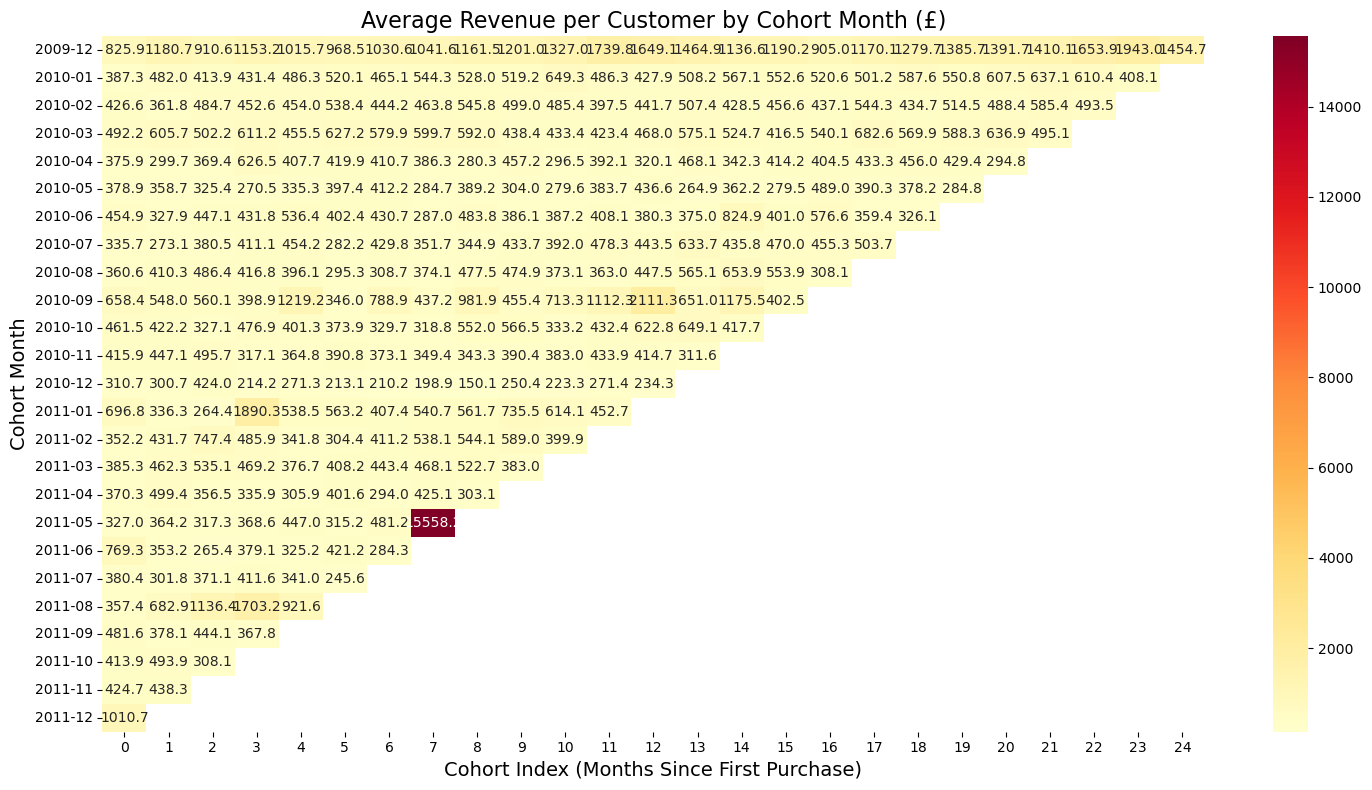

In [63]:
# Calculate average customer value over time
revenue_data = uk_customers.groupby(['CohortMonth_First', 'CohortIndex'])['TotalAmount'].sum().reset_index()
avg_revenue = revenue_data.pivot(index='CohortMonth_First', columns='CohortIndex', values='TotalAmount')
avg_revenue_per_customer = avg_revenue.divide(cohort_table)

plt.figure(figsize=(15, 8))
sns.heatmap(avg_revenue_per_customer, annot=True, cmap='YlOrRd', fmt='.1f', annot_kws={"size": 10})
plt.title('Average Revenue per Customer by Cohort Month (£)', fontsize=16)
plt.ylabel('Cohort Month', fontsize=14)
plt.xlabel('Cohort Index (Months Since First Purchase)', fontsize=14)
plt.tight_layout()

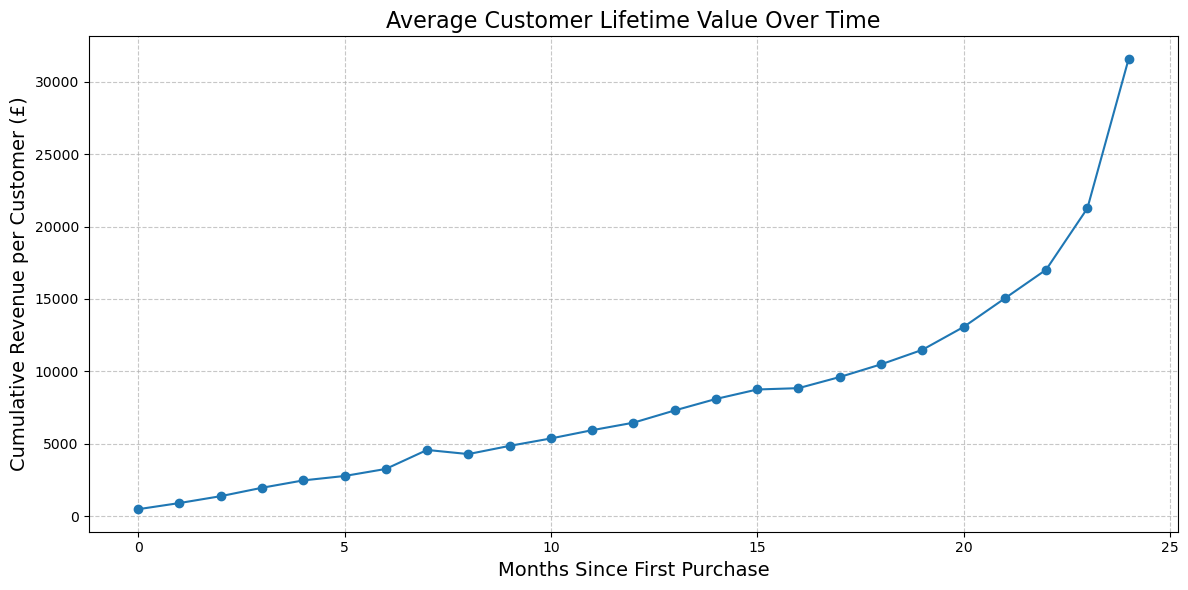

In [64]:
# Customer lifetime value analysis - cumulative revenue over cohort age
clv = avg_revenue_per_customer.cumsum(axis=1)
avg_clv = clv.mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_clv.index, avg_clv.values, marker='o')
plt.title('Average Customer Lifetime Value Over Time', fontsize=16)
plt.xlabel('Months Since First Purchase', fontsize=14)
plt.ylabel('Cumulative Revenue per Customer (£)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

## Exporting Cleaned Datasets and new Dataframes

In [66]:
# Export files
rossman_df_train.to_parquet('../data/cleaned/rossmann_train_cleaned.parquet', index=False)
rossman_df_test_merged.to_parquet('../data/cleaned/rossmann_test_cleaned.parquet', index=False)
rossman_df_store.to_parquet('../data/cleaned/rossmann_store_cleaned.parquet', index=False)
online_retail_df.to_parquet('../data/cleaned/online_retail_cleaned.parquet', index=False, engine='pyarrow')
uk_rfm.to_parquet('../data/cleaned/uk_rfm_cleaned.parquet', index=False)
cohort_table.to_parquet('../data/cleaned/cohort_table_cleaned.parquet', index=True)
cohort_table_percentage.to_parquet('../data/cleaned/cohort_table_percentage_cleaned.parquet', index=True)
print("Cleaned data exported successfully.")

Cleaned data exported successfully.
